In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
from kmodes.kmodes import KModes


In [2]:
!pip install plotly

In [3]:
#Importing the dataset and defining the dimensions of the data 
np.random.seed(19680801)

df = pd.read_stata("as_con.dta")

print("Dimension.data: {} rows and {} columns".format(len(df), len(df.columns)))
df.head()

Dimension.data: 541 rows and 5 columns


,responseid,con_indemnity_1,con_indemnity_2,con_indemnity_3,id
0,R_002eLzMuJ08uG09,Strongly Agree,Strongly Agree,Strongly Agree,R_002eLzMuJ08uG09
1,R_00NT2QHjude0JHz,NaN,NaN,NaN,R_00NT2QHjude0JHz
2,R_00dGvX6CHnxfFux,NaN,NaN,NaN,R_00dGvX6CHnxfFux
3,R_080p2Rm66zEcU5H,Agree,Agree,Strongly Agree,R_080p2Rm66zEcU5H
4,R_0VD9zIwcLcZkyPL,Agree,Agree,Agree,R_0VD9zIwcLcZkyPL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   responseid       541 non-null    object  
 1   con_indemnity_1  503 non-null    category
 2   con_indemnity_2  500 non-null    category
 3   con_indemnity_3  503 non-null    category
 4   id               541 non-null    category
dtypes: category(4), object(1)
memory usage: 32.1+ KB


In [5]:
df["con_indemnity_1"].value_counts()

Agree                277
Strongly Agree       119
Unsure                73
Disagree              26
Strongly Disagree      8
Name: con_indemnity_1, dtype: int64

In [6]:
#Tabulating the conditional indemnity
df["con_indemnity_2" ].value_counts()

Agree                223
Strongly Agree       135
Unsure               107
Disagree              30
Strongly Disagree      5
Name: con_indemnity_2, dtype: int64

In [7]:
#Tabulating the conditional indemnity
df["con_indemnity_3" ].value_counts()

Agree                244
Strongly Agree       174
Unsure                68
Disagree              10
Strongly Disagree      7
Name: con_indemnity_3, dtype: int64

In [8]:
df.select_dtypes("object").nunique()

responseid    541
dtype: int64

In [9]:
df.isna().sum()

responseid          0
con_indemnity_1    38
con_indemnity_2    41
con_indemnity_3    38
id                  0
dtype: int64

In [10]:
df.dropna(subset = ['con_indemnity_1', 'con_indemnity_2', 'con_indemnity_3'])

,responseid,con_indemnity_1,con_indemnity_2,con_indemnity_3,id
0,R_002eLzMuJ08uG09,Strongly Agree,Strongly Agree,Strongly Agree,R_002eLzMuJ08uG09
3,R_080p2Rm66zEcU5H,Agree,Agree,Strongly Agree,R_080p2Rm66zEcU5H
4,R_0VD9zIwcLcZkyPL,Agree,Agree,Agree,R_0VD9zIwcLcZkyPL
5,R_10CRVVqIN9zr9Jk,Unsure,Strongly Agree,Agree,R_10CRVVqIN9zr9Jk
6,R_10Mnl99iagNyTlA,Strongly Agree,Strongly Agree,Strongly Agree,R_10Mnl99iagNyTlA
...,...,...,...,...,...
535,R_xaAL2W0JBCcCtLr,Agree,Strongly Agree,Agree,R_xaAL2W0JBCcCtLr
536,R_xghBXRDiMfRRVfP,Agree,Unsure,Unsure,R_xghBXRDiMfRRVfP
537,R_yR7EW7hGDoJmV7b,Agree,Agree,Strongly Agree,R_yR7EW7hGDoJmV7b
538,R_yVHHZXAo0UPC121,Agree,Agree,Agree,R_yVHHZXAo0UPC121


In [11]:
df.shape

(541, 5)

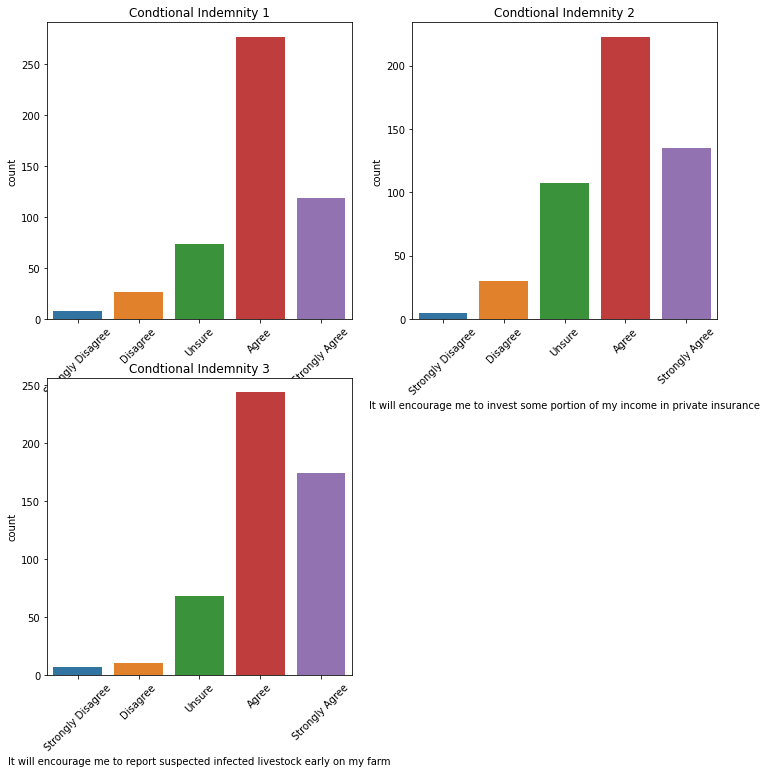

In [12]:
plt.figure(figsize=[12,12])
plt.subplot(221)
sns.countplot(x=df["con_indemnity_1"])
# plt.hist(df['con_indemnity_1'],bins="auto",color='b', fill=True, histtype= "barstacked")
plt.xlabel('It will motivate me to invest and show my biosecurity plans')
plt.title('Condtional Indemnity 1')
plt.xticks(rotation = 45) 
 
plt.subplot(222)
sns.countplot(x=df["con_indemnity_2"])
plt.xlabel('It will encourage me to invest some portion of my income in private insurance')
plt.title('Condtional Indemnity 2')
plt.xticks(rotation = 45) 
 
plt.subplot(223)
sns.countplot(x=df["con_indemnity_3"])
# plt.count(df['con_indemnity_3'],bins="auto",color='m')
plt.xlabel('It will encourage me to report suspected infected livestock early on my farm')
plt.title('Condtional Indemnity 3')
plt.xticks(rotation = 45) 

plt.savefig('CombiningGraphs.png', dpi=300)

In [13]:
df1 = df.dropna(subset = ['con_indemnity_1', 'con_indemnity_2', 'con_indemnity_3'])

In [14]:
x = df1.loc[:, df1.columns != "id"].to_numpy()
print(x)

[['R_002eLzMuJ08uG09' 'Strongly Agree' 'Strongly Agree' 'Strongly Agree']
 ['R_080p2Rm66zEcU5H' 'Agree' 'Agree' 'Strongly Agree']
 ['R_0VD9zIwcLcZkyPL' 'Agree' 'Agree' 'Agree']
 ...
 ['R_yR7EW7hGDoJmV7b' 'Agree' 'Agree' 'Strongly Agree']
 ['R_yVHHZXAo0UPC121' 'Agree' 'Agree' 'Agree']
 ['R_z6TN4lj3NGM1Vpn' 'Unsure' 'Agree' 'Agree']]


In [15]:
cost = []
k = range(1, 20)
for num_clusters in list(k):
    
    km = KModes(n_clusters = num_clusters , init = "Cao", n_init = 1, verbose=5)
    cluster = km.fit_predict(x)  
    cost.append(km.cost_) 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1254.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 43, cost: 982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 34, cost: 955.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 28, cost: 938.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 55, cost: 844.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 55, cost: 797.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 55, cost: 764.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100,

<ipython-input-16-fcaf5825b7a3>:2: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.

<ipython-input-16-fcaf5825b7a3>:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.



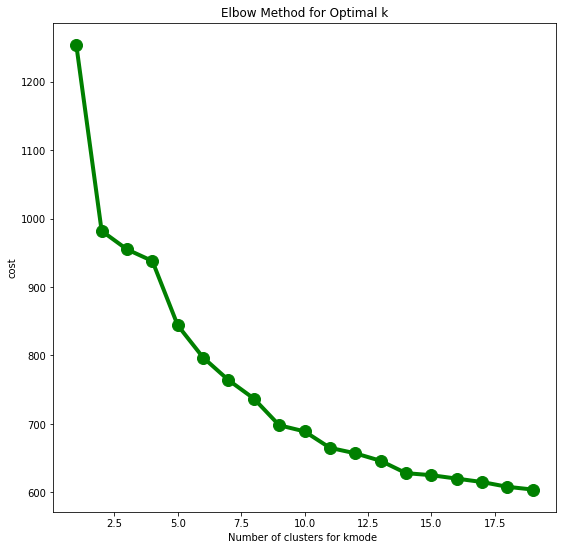

<Figure size 432x288 with 0 Axes>

In [16]:

plt.figure(figsize = (9,9))
plt.plot(k, cost, "bx-", linewidth=4, markersize=12,marker='o',color = 'green')
plt.xlabel ("Number of clusters for kmode ")
plt.ylabel ("cost")
plt.title("Elbow Method for Optimal k")
plt.show()
plt.savefig("optimal.png", dpi=300)


In [20]:
 print(km.cluster_centroids_)   

[['R_0VD9zIwcLcZkyPL' 'Agree' 'Agree' 'Agree']
 ['R_002eLzMuJ08uG09' 'Strongly Agree' 'Strongly Agree' 'Strongly Agree']
 ['R_10TTayRtV0Lalmi' 'Strongly Agree' 'Agree' 'Strongly Agree']
 ['R_10CRVVqIN9zr9Jk' 'Strongly Agree' 'Strongly Agree' 'Agree']
 ['R_1Hic1SKmmtU0Opm' 'Unsure' 'Unsure' 'Unsure']
 ['R_080p2Rm66zEcU5H' 'Agree' 'Agree' 'Strongly Agree']
 ['R_1IyilQitOcuA9r3' 'Agree' 'Strongly Agree' 'Agree']
 ['R_126lv83cBypI2DC' 'Unsure' 'Unsure' 'Agree']
 ['R_11jyjVWJuFS6maB' 'Agree' 'Unsure' 'Agree']
 ['R_1GK257X1Tdg2XSe' 'Strongly Agree' 'Agree' 'Agree']
 ['R_1NDFTwAry7GJUpL' 'Agree' 'Agree' 'Unsure']
 ['R_111RroBd03CJtrS' 'Agree' 'Unsure' 'Strongly Agree']
 ['R_10ocY3XqpAza9gb' 'Agree' 'Disagree' 'Agree']
 ['R_1BRECdhGFblUEOV' 'Unsure' 'Agree' 'Agree']
 ['R_1OK7ulQB8qPfZdx' 'Agree' 'Agree' 'Strongly Disagree']
 ['R_1E07OA6iUSETxtS' 'Disagree' 'Agree' 'Agree']
 ['R_1K3eHg6Pc6TLlSY' 'Agree' 'Strongly Agree' 'Unsure']
 ['R_1IMdST0pvjNNbKN' 'Disagree' 'Disagree' 'Strongly Agree']
 ['

In [19]:
km_cao = KModes(n_clusters = 3 , init = "Cao", n_init = 5, verbose=1)

Initialization method and algorithm are deterministic. Setting n_init to 1.


In [20]:
fitClusters_cao3 = km_cao.fit_predict(x)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 34, cost: 955.0


In [21]:
fitClusters_cao3

array([1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1,
       0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1,

/Users/richmondsilvanusbaye/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

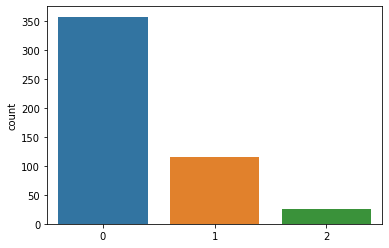

In [22]:
  sns.countplot(fitClusters_cao3)

In [23]:
clustersDf = pd.DataFrame(fitClusters_cao3)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df, clustersDf], axis = 1).reset_index()

In [24]:
print(combinedDf.head)

<bound method NDFrame.head of      index         responseid con_indemnity_1 con_indemnity_2 con_indemnity_3  \
0        0  R_002eLzMuJ08uG09  Strongly Agree  Strongly Agree  Strongly Agree   
1        1  R_00NT2QHjude0JHz             NaN             NaN             NaN   
2        2  R_00dGvX6CHnxfFux             NaN             NaN             NaN   
3        3  R_080p2Rm66zEcU5H           Agree           Agree  Strongly Agree   
4        4  R_0VD9zIwcLcZkyPL           Agree           Agree           Agree   
..     ...                ...             ...             ...             ...   
536    536  R_xghBXRDiMfRRVfP           Agree          Unsure          Unsure   
537    537  R_yR7EW7hGDoJmV7b           Agree           Agree  Strongly Agree   
538    538  R_yVHHZXAo0UPC121           Agree           Agree           Agree   
539    539  R_yyy5cc0PoZav8bL             NaN             NaN             NaN   
540    540  R_z6TN4lj3NGM1Vpn          Unsure           Agree           Agree  

In [25]:

cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

[['R_002eLzMuJ08uG09', 'Strongly Agree', 'Strongly Agree', 'Strongly Agree', 'R_002eLzMuJ08uG09'], ['R_00NT2QHjude0JHz', nan, nan, nan, 'R_00NT2QHjude0JHz'], ['R_00dGvX6CHnxfFux', nan, nan, nan, 'R_00dGvX6CHnxfFux'], ['R_080p2Rm66zEcU5H', 'Agree', 'Agree', 'Strongly Agree', 'R_080p2Rm66zEcU5H'], ['R_0VD9zIwcLcZkyPL', 'Agree', 'Agree', 'Agree', 'R_0VD9zIwcLcZkyPL'], ['R_10CRVVqIN9zr9Jk', 'Unsure', 'Strongly Agree', 'Agree', 'R_10CRVVqIN9zr9Jk'], ['R_10Mnl99iagNyTlA', 'Strongly Agree', 'Strongly Agree', 'Strongly Agree', 'R_10Mnl99iagNyTlA'], ['R_10TTayRtV0Lalmi', 'Strongly Agree', 'Agree', 'Strongly Agree', 'R_10TTayRtV0Lalmi'], ['R_10ocY3XqpAza9gb', 'Disagree', 'Disagree', 'Agree', 'R_10ocY3XqpAza9gb'], ['R_111RroBd03CJtrS', 'Agree', 'Unsure', 'Strongly Agree', 'R_111RroBd03CJtrS'], ['R_11XthBOtQoJVaMB', 'Strongly Agree', 'Unsure', 'Strongly Agree', 'R_11XthBOtQoJVaMB'], ['R_11jyjVWJuFS6maB', 'Agree', 'Unsure', 'Agree', 'R_11jyjVWJuFS6maB'], ['R_126lv83cBypI2DC', 'Unsure', 'Disagree', 

In [28]:
combinedDf.to_excel("clustr3.xlsx",
             sheet_name='Sheet_name_1') 

In [29]:
combinedDf['cluster_predicted'] = combinedDf['cluster_predicted'].replace(0, 'cluster 1')
combinedDf['cluster_predicted'] = combinedDf['cluster_predicted'].replace(1, 'cluster 2')
combinedDf['cluster_predicted'] = combinedDf['cluster_predicted'].replace(2, 'cluster 3')



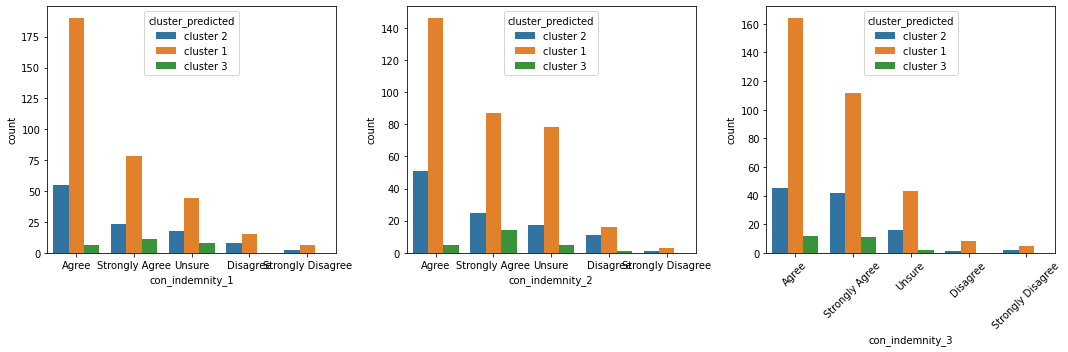

In [30]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['con_indemnity_1'],order=combinedDf['con_indemnity_1'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['con_indemnity_2'],order=combinedDf['con_indemnity_2'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['con_indemnity_3'],order=combinedDf['con_indemnity_3'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

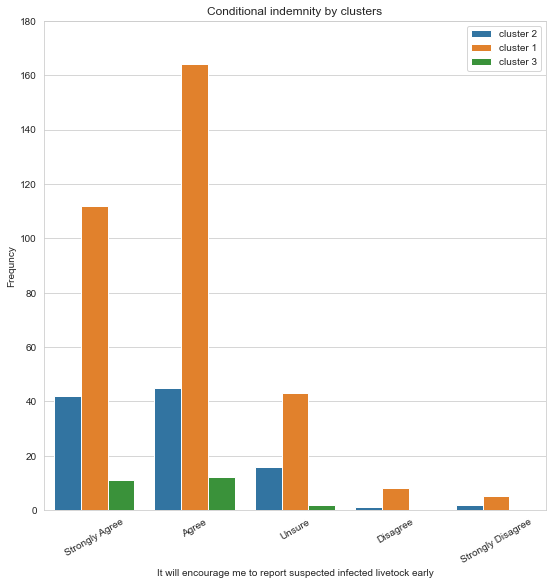

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize = (9,9))
sns.set_style("whitegrid")
category_order = ["Strongly Agree", "Agree", "Unsure", "Disagree", "Strongly Disagree"]
plt3 = sns.countplot(x=combinedDf['con_indemnity_3'],order=category_order, hue=combinedDf['cluster_predicted'],)
plt3.set_ylim(0, 180)
plt.xlabel ("It will encourage me to report suspected infected livetock early")
plt.ylabel ("Frequncy")
plt.title("Conditional indemnity by clusters")
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()
plt.savefig("2.png", dpi=300)

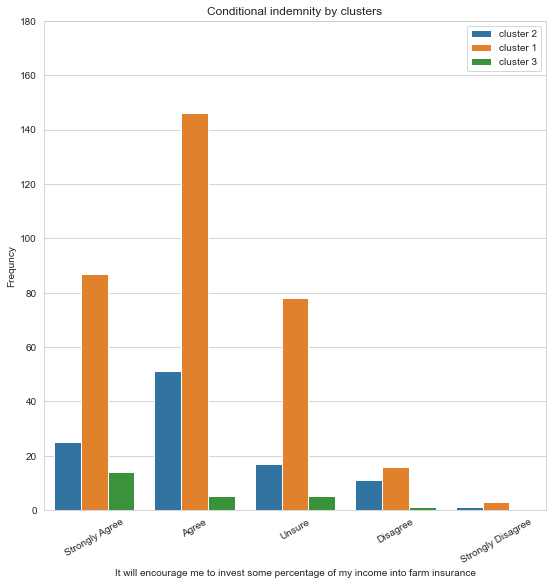

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize = (9,9))
sns.set_style("whitegrid")
category_order = ["Strongly Agree", "Agree", "Unsure", "Disagree", "Strongly Disagree"]
plt2 = sns.countplot(x=combinedDf['con_indemnity_2'],order=category_order,hue=combinedDf['cluster_predicted'],)
plt2.set_ylim(0, 180)
plt.xlabel ("It will encourage me to invest some percentage of my income into farm insurance")
plt.ylabel ("Frequncy")
plt.title("Conditional indemnity by clusters")
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()
plt.savefig("2.png", dpi=300)

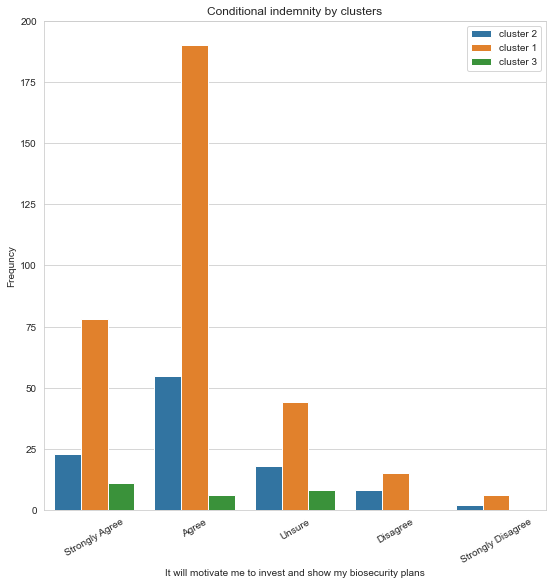

<Figure size 432x288 with 0 Axes>

In [37]:

plt.figure(figsize = (9,9))
sns.set_style("whitegrid")
category_order = ["Strongly Agree", "Agree", "Unsure", "Disagree", "Strongly Disagree"]
plt1= sns.countplot(x=combinedDf['con_indemnity_1'],order=category_order,hue=combinedDf['cluster_predicted'],)
plt1.set_ylim(0, 200)
plt.xlabel ("It will motivate me to invest and show my biosecurity plans")
plt.ylabel ("Frequncy")
plt.title("Conditional indemnity by clusters")
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.show()
plt.savefig("1.png", dpi=300)